In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%matplotlib inline

from scipy.stats import gamma, poisson

import epyestim
import epyestim.covid19 as covid19

In [27]:
ncr_cases = pd.read_csv('ncrcasecount.csv', parse_dates=['DateRepConf']).set_index('DateRepConf')['CaseCode']
ncr_cases

DateRepConf
2020-03-08        2
2020-03-09       11
2020-03-10        7
2020-03-11       13
2020-03-12        2
              ...  
2022-01-07    13732
2022-01-08    16320
2022-01-09    17093
2022-01-10    18764
2022-01-11     1939
Name: CaseCode, Length: 675, dtype: int64

In [28]:
ncr_rt = covid19.r_covid(ncr_cases)

ncr_rt

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975
2020-03-13,9.0,1.961988,0.030973,1.631772,1.956431,2.322906
2020-03-14,36.0,1.740550,0.022319,1.460340,1.736241,2.043326
2020-03-15,22.0,1.627191,0.017526,1.375481,1.623335,1.898728
2020-03-16,2.0,1.594930,0.014888,1.365125,1.591832,1.844251
2020-03-17,38.0,1.641368,0.013392,1.420739,1.638558,1.876651
...,...,...,...,...,...,...
2021-12-28,165.0,3.582870,0.000792,3.528008,3.582797,3.638149
2021-12-29,565.0,3.447578,0.000530,3.402538,3.447527,3.492769
2021-12-30,1100.0,3.184183,0.000345,3.147847,3.184146,3.220724
2021-12-31,1964.0,2.811051,0.000218,2.782155,2.811025,2.840094


In [23]:
r4_cases = pd.read_csv('r4casecount.csv', parse_dates=['DateRepConf']).set_index('DateRepConf')['CaseCode']
r4_cases = r4_cases.fillna(0)
r4_cases

DateRepConf
2020-03-08        2
2020-03-09       11
2020-03-10        7
2020-03-11       13
2020-03-12        2
              ...  
2022-01-07    13732
2022-01-08    16320
2022-01-09    17093
2022-01-10    18764
2022-01-11     1939
Name: CaseCode, Length: 675, dtype: int64

In [24]:
r4_rt = covid19.r_covid(r4_cases)

r4_rt

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975
2020-03-13,9.0,1.956008,0.030678,1.632465,1.950850,2.312794
2020-03-14,36.0,1.734670,0.022191,1.459145,1.730606,2.040052
2020-03-15,22.0,1.621989,0.017436,1.374713,1.618442,1.891783
2020-03-16,2.0,1.590343,0.014798,1.359200,1.587225,1.837731
2020-03-17,38.0,1.630364,0.013358,1.411584,1.627605,1.865801
...,...,...,...,...,...,...
2021-12-28,165.0,3.583176,0.000792,3.528248,3.583102,3.638521
2021-12-29,565.0,3.446657,0.000530,3.401608,3.446605,3.491998
2021-12-30,1100.0,3.183401,0.000345,3.147106,3.183365,3.219898
2021-12-31,1964.0,2.812562,0.000218,2.783700,2.812536,2.841572


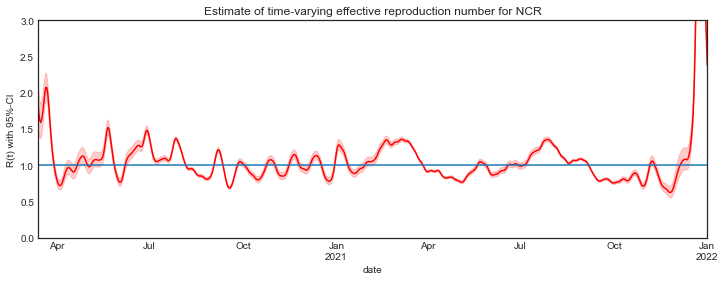

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))

ncr_rt.loc[:,'Q0.5'].plot(ax=ax, color='red')
ax.fill_between(ncr_rt.index, 
                    ncr_rt['Q0.025'], 
                    ncr_rt['Q0.975'], 
                    color='red', alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('R(t) with 95%-CI')
ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('Estimate of time-varying effective reproduction number for NCR')
plt.show()

In [29]:
#before Cori et al.
ph_rt_0 = covid19.r_covid(ph_cases, auto_cutoff=False)

ph_rt_0.tail()

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975
2022-01-07,13732.0,1.281170,0.000026,1.271266,1.281163,1.291112
2022-01-08,16320.0,1.235193,0.000023,1.225793,1.235187,1.244612
2022-01-09,17093.0,1.178221,0.000021,1.169311,1.178215,1.187161
2022-01-10,18764.0,1.111519,0.000018,1.103113,1.111513,1.119955
2022-01-11,1939.0,1.064481,0.000017,1.056432,1.064476,1.072567


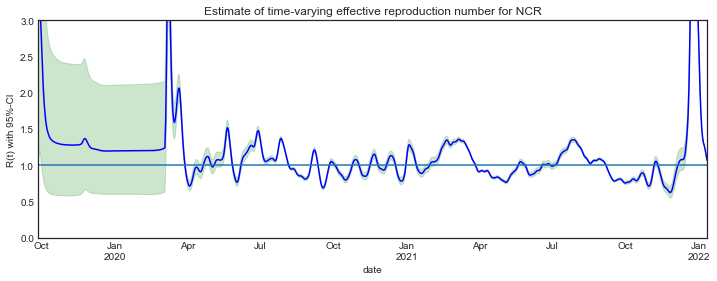

In [32]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))

ph_rt_0.loc[:,'Q0.5'].plot(ax=ax, color='blue')
ax.fill_between(ph_rt_0.index, 
                    ph_rt_0['Q0.025'], 
                    ph_rt_0['Q0.975'], 
                    color='green', alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('R(t) with 95%-CI')
ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('Estimate of time-varying effective reproduction number for NCR')
plt.show()

In [33]:
ph_rt.to_csv("ph_rt.csv")